# Scikit-learn Introduction

Scikit-learn is a library for machine learning in Python.  It helps us in all of the following ways:

    1. Preprocessing: Getting the data into shape for Machine Learning
    2. Dimensionality Reduction: Reducing redundancy in variables
    3. Classification: Predicting one of a finite set of classes for data.
    4. Regression: Predicting a response variable
    5. Clustering: Finding natural patterns in the data.
    6. Model Selection: Finding the best model for our data.


We will be looking at our NYCFlights13 dataset here.   


In [40]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation  import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


flights = pd.read_csv('../../data/nycflights13/flights.csv.gz')
weather = pd.read_csv('../../data/nycflights13/weather.csv.gz')
airports = pd.read_csv('../../data/nycflights13/airports.csv.gz')

df_withweather = pd.merge(flights, weather, how='left', on=['year','month', 'day', 'hour'])
df = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')

df = df.dropna()

In [41]:
# Let's examine the data

df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
8,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
9,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
10,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
11,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
12,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
13,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
14,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,10.0,2013-01-01 01:00:00,MCO,Orlando Intl,28.429394,-81.308994,96.0,-5.0,A,America/New_York


## Feature Vector

Let's create a feature vector.

In [42]:

pred = 'dep_delay'
features =  ['month','day','dep_time','arr_time','carrier','dest','air_time','distance', 
             'lat', 'lon', 'alt',  'dewp', 'humid', 'wind_speed', 'wind_gust', 
             'precip', 'pressure', 'visib' ]

features_v = df[features]
pred_v = df[pred]

pd.options.mode.chained_assignment = None  # default='warn'

# carrier is not a number, so transform it into an number
features_v['carrier'] = pd.factorize(features_v['carrier'])[0]

# dest is not a number, so transform it into a number
features_v['dest'] = pd.factorize(features_v['dest'])[0]



In [43]:
# Let's look at our feature vector

features_v

,month,day,dep_time,arr_time,carrier,dest,air_time,distance,lat,lon,alt,dewp,humid,wind_speed,wind_gust,precip,pressure,visib
4,1,1,554.0,812.0,0,0,116.0,762,33.636719,-84.428067,1026.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
5,1,1,554.0,812.0,0,0,116.0,762,33.636719,-84.428067,1026.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
6,1,1,554.0,812.0,0,0,116.0,762,33.636719,-84.428067,1026.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
8,1,1,555.0,913.0,1,1,158.0,1065,26.072583,-80.152750,9.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
9,1,1,555.0,913.0,1,1,158.0,1065,26.072583,-80.152750,9.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
10,1,1,555.0,913.0,1,1,158.0,1065,26.072583,-80.152750,9.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
11,1,1,557.0,709.0,2,2,53.0,229,38.944533,-77.455811,313.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
12,1,1,557.0,709.0,2,2,53.0,229,38.944533,-77.455811,313.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
13,1,1,557.0,709.0,2,2,53.0,229,38.944533,-77.455811,313.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
14,1,1,557.0,838.0,1,3,140.0,944,28.429394,-81.308994,96.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0


### Scaling the feature vector

Let's scale the feature vector.

In [44]:
# Notice how the magnitude of the dimensions is wildly different. Let's try scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_v)




In [45]:
scaled_features

array([[-1.62498171, -1.69693092, -1.62908082, ..., -0.11420569,
        -0.79438586,  0.29213712],
       [-1.62498171, -1.69693092, -1.62908082, ..., -0.11420569,
        -0.71389571,  0.29213712],
       [-1.62498171, -1.69693092, -1.62908082, ..., -0.11420569,
        -0.80780089,  0.29213712],
       ..., 
       [ 0.71764151,  1.6218685 ,  1.98106144, ..., -0.11420569,
        -0.33827498,  0.29213712],
       [ 0.71764151,  1.6218685 ,  1.98106144, ..., -0.11420569,
        -0.25778483,  0.29213712],
       [ 0.71764151,  1.6218685 ,  1.98106144, ..., -0.11420569,
        -0.33827498,  0.29213712]])

### Reducing Dimensions

Let's use PCA to reduce dimensions down to two.

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(scaled_features).transform(scaled_features)

In [47]:
X_r

array([[-0.32037042, -0.88644728],
       [-0.32299456, -0.72459261],
       [-0.32445309, -0.59860114],
       ..., 
       [-2.11030333,  0.78912234],
       [-2.10110501,  0.41137209],
       [-2.11404848,  1.0450578 ]])

# Plotting

Let's do a quick plot of the data. Because we have many dimensions and we want a 2-D plot, we need to reduce dimensions down to 2.  We can do this with PCA, which will reduce the dimensions to only two by combining redundant features into two principal components.


explained variance ratio (first two components): [ 0.16961825  0.14269872]


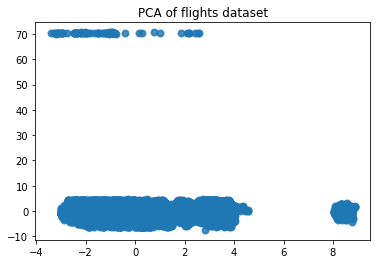

In [48]:
import matplotlib.pyplot as plt


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
lw = 2

plt.scatter(X_r[:,0], X_r[:,1], alpha=.8, lw=lw)
plt.title('PCA of flights dataset')

